Data Importing

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('https://query.data.world/s/a6r4iknu3umuehhjbavz6rxe6l62z6')

In [162]:
df.head(20)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending,Match Number,Result
0,11,92,-,-,0,-,6,lbw,1,v Sri Lanka,Chandigarh,1990-11-23,Test # 1156,Won
1,50,158,118,6,0,42.37,4,caught,1,v England,Kolkata,1993-01-29,Test # 1211,Won
2,9,17,19,2,0,47.36,4,not out,4,v England,Kolkata,1993-01-29,Test # 1211,Won
3,165,361,296,24,1,55.74,4,caught,1,v England,Chennai,1993-02-11,Test # 1213,Won
4,78,285,213,10,0,36.61,4,lbw,2,v England,Mumbai,1993-02-19,Test # 1214,Won
5,62,128,114,7,0,54.38,4,caught,1,v Zimbabwe,Delhi,1993-03-13,Test # 1218,Won
6,28,74,52,5,0,53.84,4,caught,1,v Sri Lanka,Colombo (SSC),1993-07-27,Test # 1228,Won
7,104,217,161,11,1,64.59,4,not out,3,v Sri Lanka,Colombo (SSC),1993-07-27,Test # 1228,Won
8,142,260,224,22,0,63.39,4,caught,1,v Sri Lanka,Lucknow,1994-01-18,Test # 1244,Won
9,96,180,140,15,0,68.57,4,bowled,1,v Sri Lanka,Bengaluru,1994-01-26,Test # 1245,Won


In [204]:
df=df.rename(columns={'Start DateAscending':'match_date', 'Match Number':'match'})

##data cleaning and preparing##

In [163]:
df=df.sort_values(by=['Start DateAscending'])

In [164]:
df.replace(['-','DNB','TDNB'],0,inplace=True)

In [205]:
df['Cumsum']=df['Runs'].cumsum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 231 to 118
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Runs        347 non-null    int64         
 1   Mins        347 non-null    int64         
 2   BF          347 non-null    int64         
 3   4s          347 non-null    int64         
 4   6s          347 non-null    int64         
 5   SR          347 non-null    float64       
 6   Pos         347 non-null    int64         
 7   Dismissal   347 non-null    object        
 8   Inns        347 non-null    int64         
 9   Opposition  347 non-null    object        
 10  Ground      347 non-null    object        
 11  match_date  347 non-null    datetime64[ns]
 12  match       347 non-null    object        
 13  Result      347 non-null    object        
 14  Cumsum      347 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(5)
memory usage: 43.4

In [167]:
df.groupby('Opposition').agg({'Runs':[('Runs','sum')]})
##df.groupby('Opposition')['Start DateAscending'].nunique()
##df['Start DateAscending'].nunique()

,Runs
,Runs
Opposition,
v Australia,3630
v Bangladesh,820
v England,2535
v New Zealand,1595
v Pakistan,1057
v South Africa,1741
v Sri Lanka,1995
v West Indies,1630


TypeError: 'str' object is not callable

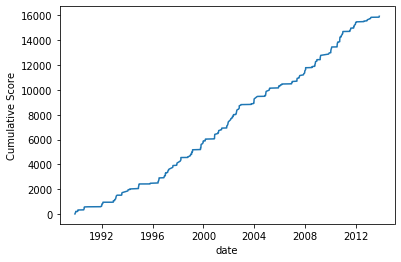

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(df['match_date'], df['Cumsum'])
plt.xlabel('date')
plt.ylabel('Cumulative Score')
plt.title('My first graph!')
plt.show()

In [169]:
df.groupby(pd.DatetimeIndex(df['match_date']).year).agg({'Runs':[('Runs','sum')]})

,Runs
,Runs
Start DateAscending,
1989,215
1990,373
1991,78
1992,419
1993,640
1994,700
1995,58
1996,623


In [266]:
a=df.groupby(pd.DatetimeIndex(df['match_date']).year).Runs.sum()
a

match_date
1989     215
1990     373
1991      78
1992     419
1993     640
1994     700
1995      58
1996     623
1997    1000
1998     647
1999    1088
2000     575
2001    1003
2002    1392
2003     153
2004     915
2005     444
2006     267
2007     776
2008    1063
2009     541
2010    1562
2011     756
2012     357
2013     276
Name: Runs, dtype: int64

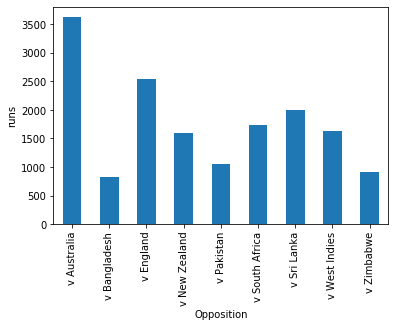

In [190]:
a=df.groupby('Opposition').Runs.sum()
plt.xlabel('Contry')
plt.ylabel('runs')
##plt.title('Country wise runs')
a.plot(kind='bar')


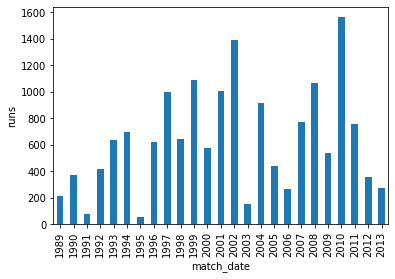

In [221]:
a=df.groupby(pd.DatetimeIndex(df['match_date']).year).Runs.sum()
plt.xlabel('Country')
plt.ylabel('runs')
#plt.title('Country wise runs')
a.plot(kind='bar')

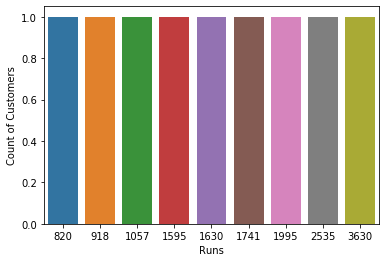

In [304]:
sns.countplot(x=df['Opposition'].unique(),data=a['Runs'])
plt.ylabel("Count of Customers")
#plt.title("Count of customers based on ")
plt.show()


In [228]:
df['Opposition'].unique()

array(['v Pakistan', 'v New Zealand', 'v England', 'v Sri Lanka',
       'v Australia', 'v Zimbabwe', 'v South Africa', 'v West Indies',
       'v Bangladesh'], dtype=object)

In [342]:
a=df.groupby(by=["Opposition"], as_index=False).sum()
#b=df.groupby(["Opposition"]).nunique()
#a['match_count']=b['match']
#a['RPM']=a['Runs']/a['match_count']
#df
a

,Opposition,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Cumsum
0,v Australia,3630,8966,6110,434,25,4136.39,318,189,697667
1,v Bangladesh,820,1943,1294,87,4,553.87,38,24,116796
2,v England,2535,6722,4855,357,8,2649.86,229,138,512971
3,v New Zealand,1595,4150,2997,212,6,2021.40,165,101,331308
4,v Pakistan,1057,3061,2114,141,0,1348.68,122,78,225256
5,v South Africa,1741,5050,3648,242,9,1892.44,186,111,328327
6,v Sri Lanka,1995,5087,3674,241,10,2077.20,150,71,293076
7,v West Indies,1630,4218,3148,218,5,1485.10,129,76,250858
8,v Zimbabwe,918,2107,1597,126,2,770.82,58,34,80695


In [362]:
a.iloc[2]


Opposition    v England
Runs               2535
Mins               6722
BF                 4855
4s                  357
6s                    8
SR              2649.86
Pos                 229
Inns                138
Cumsum           512971
Name: 2, dtype: object